#  <font color=red> Module_09_時間序列建模</font>

## 日期、時間、區間的表示方法以及工具

### datetime、day、time 物件

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# import datetime 要使用 datetime 類別，要寫 datetime.datetime()
# 但是因為這個類別太常用，所以我們使用 from datetime import datetime 比較簡潔方便
# 這樣就可以直接調用 datetime() 類別與建立實體物件
# datetime 物件包括年、月、日、時、分...
# 來 new 一個 datetime 實體物件
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [2]:
datetime(2014, 12, 15, 17, 30, 5) # 年、月、日、時、分、秒

datetime.datetime(2014, 12, 15, 17, 30, 5)

In [3]:
# 調用類方法，直接生成現在的時間，返回現在時間的實體物件
now = datetime.now()
now

datetime.datetime(2021, 10, 18, 18, 21, 48, 818417)

In [4]:
# 可以用它的屬性直接獲得年、月、日、時、分、秒
# 別忘了這是 tuple 的寫法
now.year, now.month, now.day, now.hour, now.minute, now.second

(2021, 10, 18, 18, 21, 48)

---

In [5]:
from datetime import date
d = date(2020, 3, 10) # datetime.date 物件代表特定的一天 (沒有時間成分)
d

datetime.date(2020, 3, 10)

In [6]:
d.year, d.month, d.day

(2020, 3, 10)

---

In [7]:
# 如果是日期時間物件怎麼把時間去除 ?
day = datetime(2021, 2, 23, 8, 10)
day

datetime.datetime(2021, 2, 23, 8, 10)

In [8]:
# 調用 .date() 方法就可以把時間給刪掉，返回日期實體物件
day.date()

datetime.date(2021, 2, 23)

In [9]:
datetime.now().date()

datetime.date(2021, 10, 18)

---

---

In [10]:
# 使用剛剛的邏輯，這是沒有日期成分的時間
from datetime import time
time(4, 50, 40) # 時、分、秒

datetime.time(4, 50, 40)

In [11]:
day = datetime(2014, 12, 15, 17, 30)
day

datetime.datetime(2014, 12, 15, 17, 30)

In [12]:
day.time()

datetime.time(17, 30)

In [13]:
datetime.now().time()

datetime.time(18, 21, 48, 973336)

### 以 Timestamp 表示一個時間點

In [14]:
# Pandas 裡日期與時間的表示，是利用 pandas.tslib.Timestamp 類別執行
# 其精準度比 python 的 datetime 物件來得高
# 且 pd.Timestamp() 類別看得懂字串
# 來 new 一個 Timestamp 實體物件
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [15]:
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [16]:
pd.Timestamp(2014, 12, 15, 17, 30) # 當然也可以按照之前那種習慣的寫法!

Timestamp('2014-12-15 17:30:00')

In [17]:
# Timestamp 也可以只以時間建立
# 此時日期會預設為本地日期
pd.Timestamp('17:30')

Timestamp('2021-10-18 17:30:00')

In [18]:
pd.Timestamp('now')

Timestamp('2021-10-18 18:21:49.049964')

### 以 Timedelta 表示時間區間

In [19]:
# datetime 儲存了日期、時間，精確度可以到微秒。 timedelta 物件用來表示兩個 datetime 物件之間的時間差
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [20]:
# timedelta 物件的 days 屬性
delta.days

926

In [21]:
# timedelta 物件的 seconds 屬性
delta.seconds

56700

---

In [22]:
from datetime import timedelta

start = datetime(2011, 1, 7) # 沒有設定時間，預設就是都是 0
start

datetime.datetime(2011, 1, 7, 0, 0)

In [23]:
start + timedelta(12, 45, 50) # timedelta(日, 秒, 微秒)

datetime.datetime(2011, 1, 19, 0, 0, 45, 50)

In [24]:
start - 2*timedelta(12) # 減去 24 天

datetime.datetime(2010, 12, 14, 0, 0)

In [25]:
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(days=4)

---

In [26]:
# 也可使用 pandas 的全域函式 pd.Timedelat()
today = datetime(2014, 11, 30)
today

datetime.datetime(2014, 11, 30, 0, 0)

In [27]:
tomorrow = today + pd.Timedelta(days = 1) # 參數有很多可選，需要時再上網查
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

---

In [28]:
today = pd.Timestamp('2014-11-30')
today

Timestamp('2014-11-30 00:00:00')

In [29]:
tomorrow = today + pd.Timedelta(days = 1)
tomorrow

Timestamp('2014-12-01 00:00:00')

### 字串和時間日期轉換

In [30]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [31]:
# 使用 str() 函式轉換成字串
str(stamp)

'2011-01-03 00:00:00'

In [32]:
# 使用 datetime 物件的 .strftime() 方法轉換成字串，可自選格式
stamp.strftime('%Y-%m-%d')

'2011-01-03'

---

In [33]:
stamp = pd.Timestamp(2011, 1, 3)
stamp

Timestamp('2011-01-03 00:00:00')

In [34]:
str(stamp)

'2011-01-03 00:00:00'

In [35]:
# Timestamp 物件一樣有 .strftime() 方法可以用
stamp.strftime('%Y-%m-%d')

'2011-01-03'

---

In [36]:
# 使用類方法 datetime.strptime() 把字串轉日期
# 要給出正確的時間日期形式才能解析成功
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [37]:
value = '2011-01-03 00:00:00'
datetime.strptime(value, '%Y-%m-%d') # 形式沒給對!

ValueError: unconverted data remains:  00:00:00

In [47]:
value = '2011-01-03 00:00:00'
datetime.strptime(value, '%Y-%m-%d %H:%M:%S')

datetime.datetime(2011, 1, 3, 0, 0)

In [48]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(i, '%m/%d/%Y') for i in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

---

In [49]:
value

'2011-01-03 00:00:00'

In [50]:
# 也可以用 pandas 的全域函式 pd.to_datetime() 來解析字串
# 會返回 Timestamp 物件
pd.to_datetime(value)

Timestamp('2011-01-03 00:00:00')

In [51]:
datestrs

['7/6/2011', '8/6/2011']

In [52]:
# 會返回 DatetimeIndex 物件
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

---

In [53]:
value

'2011-01-03 00:00:00'

In [54]:
pd.Timestamp(value) # 直接把 value 帶入，new 一個實體物件也是可以

Timestamp('2011-01-03 00:00:00')

In [55]:
datestrs

['7/6/2011', '8/6/2011']

In [56]:
pd.Timestamp(datestrs) # 這樣當然會失敗!

TypeError: Cannot convert input [['7/6/2011', '8/6/2011']] of type <class 'list'> to Timestamp

---

In [57]:
# 還可以使用第三方套件 dateutil 中的 parser.parse 模組來解析
# 可以不用寫格式規格，相當方便，但不是什麼形式都可以解析成功喔!
# 會返回 datetime 物件
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [58]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [59]:
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [60]:
parse('6/12/2011', dayfirst = True) # 參數 dayfirst 會使第一位當成日，跟上面比較看看!

datetime.datetime(2011, 12, 6, 0, 0)

In [61]:
parse(datestrs) # 也沒辦法帶入列表

TypeError: Parser must be a string or character stream, not list

## 時間序列資料簡介

### 使用 DatetimeIndex 作為索引

In [62]:
# 用 datetime 物件來建立
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), index = dates)
ts

2014-08-01    1.862535
2014-08-02   -0.847605
dtype: float64

In [63]:
ts.index

DatetimeIndex(['2014-08-01', '2014-08-02'], dtype='datetime64[ns]', freq=None)

In [64]:
type(ts.index) # 序列接收 datetime 物件後，從日期值建構 DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

In [65]:
ts.index[0] # 雖然是用 datetime 物件建構，但放進序列後會統一都換成 Timestamp 物件

Timestamp('2014-08-01 00:00:00')

In [66]:
type(ts.index[0]) # 每個索引值都是一個 Timestamp 物件

pandas._libs.tslibs.timestamps.Timestamp

---

In [67]:
# 用 Timestamp 物件來建立，好處之一是可以直接使用字串
dates = [pd.Timestamp('2014-08-01'), pd.Timestamp('2014-08-02')]
ts = pd.Series(np.random.randn(2), index = dates)
ts

2014-08-01   -1.051147
2014-08-02    1.128789
dtype: float64

In [68]:
ts.index

DatetimeIndex(['2014-08-01', '2014-08-02'], dtype='datetime64[ns]', freq=None)

In [69]:
ts.index[0]

Timestamp('2014-08-01 00:00:00')

---

In [70]:
# 也可以先用字串組成一個列表再傳入 pd.DatetimeIndex 類別，建立一個實體物件
# 也就是直接 new 一個 DatetimeIndex 物件
dates = ['2014-08-01', '2014-08-02']
dates = pd.DatetimeIndex(dates)
dates

DatetimeIndex(['2014-08-01', '2014-08-02'], dtype='datetime64[ns]', freq=None)

In [71]:
ts = pd.Series(np.random.randn(2), index = dates)
ts

2014-08-01   -0.168144
2014-08-02    0.980029
dtype: float64

In [72]:
ts.index

DatetimeIndex(['2014-08-01', '2014-08-02'], dtype='datetime64[ns]', freq=None)

In [73]:
ts.index[0]

Timestamp('2014-08-01 00:00:00')

---

In [74]:
# 函式 pd.to_datetime() 接收一系列相似或混合型別物件，嘗試將這些物件轉換成 Timestamp 物件以及產生 DatetimeIndex 物件
# 無法轉換會填入 NaT
dti = pd.to_datetime(['Aug 1, 2014', '2014-08-02', '2014.8.3', None])
dti

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [75]:
for i in dti: print(i) 

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [76]:
pd.to_datetime(['Aug 1, 2014', 'foo']) # 無法解析是什麼的會產生例外

ParserError: Unknown string format: foo

In [77]:
pd.to_datetime(['Aug 1, 2014', 'foo'], errors = "coerce") # 設定參數 errors = "coerce" 會把無法解析是什麼的也產生 NaT

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

---

In [78]:
# 之前很常遇到的用 pd.date_range() 函式建立 DatetimeIndex
# pd.date_range() 可以給開頭時間，再設定參數 periods 和 freq
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods = 10) # 預設 freq = 'D'
date_series = pd.Series(np.random.randn(10), index = periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [79]:
date_series.index

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', '2014-08-04',
               '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
               '2014-08-09', '2014-08-10'],
              dtype='datetime64[ns]', freq='D')

In [80]:
type(date_series.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [82]:
s2  = pd.Series([10, 100, 1000, 10000], index = subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

---

In [83]:
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [84]:
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [85]:
# 會執行對齊
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

---

In [86]:
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [87]:
# 可用 datetime 物件來提取
date_series[datetime(2014, 8, 5)]

1.2121120250208506

In [88]:
# 可用 Timestamp 物件來提取
date_series[pd.Timestamp('2014-8-5')]

1.2121120250208506

In [89]:
# 也可直接透過字串來提取
# 當然也可以用 .loc[] 運算子
date_series['2014-08-05']

1.2121120250208506

---

In [90]:
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [91]:
# 索引標籤的切片是會包含最後一項的喔!
# 記得此處的切片跟之前對 NumPy 陣列做切片時一樣，是會在原始資料上產生一個 view，在 view 上做的修改會同步到原始資料上
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [92]:
date_series[datetime(2014, 8, 5):]

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [93]:
date_series.truncate(after = '8/9/2014') # 序列的方法， 參數 after 之後的都不要 # 也有參數 before 可用

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
Freq: D, dtype: float64

---

In [94]:
# pd.date_range() 也可以給開頭時間跟結束時間，再設定參數 freq
dates  = pd.date_range('2013-01-01', '2014-12-31', freq = 'M') # freq = 'M'，是月底 # freq = 'MS' 是月初
s3 = pd.Series(np.random.randint(0, 10, len(dates)), index = dates)
s3

2013-01-31    2
2013-02-28    6
2013-03-31    2
2013-04-30    4
2013-05-31    4
2013-06-30    7
2013-07-31    4
2013-08-31    4
2013-09-30    4
2013-10-31    5
2013-11-30    1
2013-12-31    7
2014-01-31    4
2014-02-28    3
2014-03-31    7
2014-04-30    0
2014-05-31    2
2014-06-30    2
2014-07-31    0
2014-08-31    4
2014-09-30    1
2014-10-31    4
2014-11-30    4
2014-12-31    5
Freq: M, dtype: int32

In [95]:
s3.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', freq='M')

In [96]:
# 可利用日期規格的一部分來切割 DatetimeIndex
# 跟 s3[s3.index.year == 2013] 布林選擇同效果
s3['2013']

2013-01-31    2
2013-02-28    6
2013-03-31    2
2013-04-30    4
2013-05-31    4
2013-06-30    7
2013-07-31    4
2013-08-31    4
2013-09-30    4
2013-10-31    5
2013-11-30    1
2013-12-31    7
Freq: M, dtype: int32

In [97]:
s3['2014-05']

2014-05-31    2
Freq: M, dtype: int32

In [98]:
s3['2014-08':'2014-09']

2014-08-31    4
2014-09-30    1
Freq: M, dtype: int32

---

In [99]:
# 若目標改為 Dataframe，當然也可以用一樣的邏輯使用 pd.data_range() 函式
dates = pd.date_range('1/1/2000', periods = 100, freq = 'W-WED') # freq = 'W-WED' 代表每周的禮拜三
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index = dates,
                       columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.443581,-0.192138,2.696078,-2.544885
2000-01-12,0.164706,2.346670,-0.494791,-0.767777
2000-01-19,-1.382949,0.500507,-0.860487,-0.318977
2000-01-26,1.440828,0.348954,1.265071,1.247793
2000-02-02,1.074267,-1.200309,0.160879,0.866112
...,...,...,...,...
2001-10-31,0.232777,1.048589,0.070084,-0.774247
2001-11-07,-0.436052,0.274093,1.386100,0.705452
2001-11-14,0.515768,0.352642,0.230562,0.134564
2001-11-21,1.308354,-1.308459,-0.341094,-1.998943


In [100]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.902767,2.488163,1.362758,-2.162940
2001-05-09,1.392318,-0.076521,-0.896537,-0.694855
2001-05-16,0.173139,-3.380387,0.405307,-0.550870
2001-05-23,-2.662692,-1.909396,1.147297,-0.427149
2001-05-30,1.169476,-0.136027,0.134966,1.438186


### 有重複索引的時間序列

In [101]:
# 在某些應用中，同一個時間戳記有可能有多個觀察值
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index = dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [102]:
dup_ts.index.is_unique

False

In [103]:
# 沒有重複，產生常數值
dup_ts['1/3/2000']

4

In [104]:
# 重複，會產生切片，也就是一個序列
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [105]:
grouped = dup_ts.groupby(level = 0)

In [106]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [107]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 建立特定頻率的時間序列

In [108]:
# 預設為 freq = 'D'，是以每日的區間為頻率來建立
dates = pd.date_range('2014-08-01', '2014-10-29')
bymin = pd.Series(np.random.randn(len(dates)),
                  index = dates)
bymin

2014-08-01    0.556593
2014-08-02   -0.217056
2014-08-03    0.035573
2014-08-04    0.837615
2014-08-05   -0.794343
                ...   
2014-10-25   -0.004889
2014-10-26    1.134393
2014-10-27    1.157255
2014-10-28   -0.768314
2014-10-29   -1.164655
Freq: D, Length: 90, dtype: float64

In [109]:
# freq = 'T'， 是以每分鐘的區間為頻率來建立
dates = pd.date_range('2014-08-01', '2014-10-29 23:59', freq = 'T')
bymin = pd.Series(np.random.randn(len(dates)),
                  index = dates)
bymin

2014-08-01 00:00:00    0.263509
2014-08-01 00:01:00   -1.455981
2014-08-01 00:02:00   -1.884523
2014-08-01 00:03:00    0.467159
2014-08-01 00:04:00    1.177217
                         ...   
2014-10-29 23:55:00   -0.817056
2014-10-29 23:56:00    1.515577
2014-10-29 23:57:00    2.028740
2014-10-29 23:58:00   -0.717172
2014-10-29 23:59:00    0.229811
Freq: T, Length: 129600, dtype: float64

In [110]:
bymin['2014-08-01 00:02':'2014-08-01 00:07']

2014-08-01 00:02:00   -1.884523
2014-08-01 00:03:00    0.467159
2014-08-01 00:04:00    1.177217
2014-08-01 00:05:00   -0.837585
2014-08-01 00:06:00    0.426389
2014-08-01 00:07:00   -0.367504
Freq: T, dtype: float64

In [111]:
# freq = 'B' 建立只有營業日的時間序列
# 周末的兩天被忽略了
days = pd.date_range('2014-08-29', '2014-09-05', freq = 'B')
days

DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02', '2014-09-03',
               '2014-09-04', '2014-09-05'],
              dtype='datetime64[ns]', freq='B')

In [112]:
# BM (business end of month): 每個月的最後一個上班日
pd.date_range('2000-01-01', '2000-12-01', freq = 'BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [113]:
pd.date_range('2000-01-01', '2000-01-02', freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [114]:
pd.date_range('2000-01-01', '2000-01-02', freq = '4h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:30:00',
               '2000-01-01 09:00:00', '2000-01-01 13:30:00',
               '2000-01-01 18:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='270T')

---

In [115]:
# 如果只有傳入開始或結束時間的話，必須在另外傳入要產生多少周期的數量
pd.date_range(start = '2014-08-01 12:10:01', freq = 'S', periods = 5) # 頻率為秒

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02',
               '2014-08-01 12:10:03', '2014-08-01 12:10:04',
               '2014-08-01 12:10:05'],
              dtype='datetime64[ns]', freq='S')

In [116]:
pd.date_range(end = '2014-08-01 12:10:01', periods = 10)

DatetimeIndex(['2014-07-23 12:10:01', '2014-07-24 12:10:01',
               '2014-07-25 12:10:01', '2014-07-26 12:10:01',
               '2014-07-27 12:10:01', '2014-07-28 12:10:01',
               '2014-07-29 12:10:01', '2014-07-30 12:10:01',
               '2014-07-31 12:10:01', '2014-08-01 12:10:01'],
              dtype='datetime64[ns]', freq='D')

In [117]:
# normalize = True 會把時間統一設為午夜
pd.date_range('2012-05-02 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 使用偏移值計算新日期

### 以日期偏移值表示資料區間

In [118]:
# pandas 利用 Dateoffset 物件的觀念，延伸了 Timedelta 物件的概念
# Dateoffset 物件的功能更強大
dti = pd.date_range('2014-08-29', '2014-09-05', freq = 'B')
dti

DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02', '2014-09-03',
               '2014-09-04', '2014-09-05'],
              dtype='datetime64[ns]', freq='B')

In [119]:
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [120]:
dti.freq

<BusinessDay>

---

In [121]:
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1)
d + do

Timestamp('2014-08-30 00:00:00')

In [122]:
# 跟上面同樣效果，但是返回不同的物件
do = pd.Timedelta(days = 1)
d + do

datetime.datetime(2014, 8, 30, 0, 0)

---

In [123]:
d

datetime.datetime(2014, 8, 29, 0, 0)

In [124]:
from pandas.tseries.offsets import BusinessDay

d + BusinessDay() # 加一天營業日

Timestamp('2014-09-01 00:00:00')

In [125]:
d + 2*BusinessDay()

Timestamp('2014-09-02 00:00:00')

---

In [126]:
d

datetime.datetime(2014, 8, 29, 0, 0)

In [127]:
from pandas.tseries.offsets import Hour, Minute, Day
d + Hour() # 更多的偏移量可以使用 # 裡面不給值預設 1 小時

Timestamp('2014-08-29 01:00:00')

In [128]:
d + 3*Day()

Timestamp('2014-09-01 00:00:00')

In [129]:
d + Hour(4) + Minute(30)

Timestamp('2014-08-29 04:30:00')

---

In [130]:
d

datetime.datetime(2014, 8, 29, 0, 0)

In [131]:
from pandas.tseries.offsets import BMonthEnd, MonthEnd
d + BMonthEnd() # 月的最後一個營業日，也就是月的最後一個上班日

Timestamp('2014-09-30 00:00:00')

In [132]:
d2 = datetime(2014, 8, 10)
d2

datetime.datetime(2014, 8, 10, 0, 0)

In [133]:
d2 + BMonthEnd()

Timestamp('2014-08-29 00:00:00')

In [134]:
d2 + MonthEnd() # 這是月的最後一天喔!

Timestamp('2014-08-31 00:00:00')

---

In [135]:
d3 = pd.Timestamp('2014-08-10')
d3 + BMonthEnd()

Timestamp('2014-08-29 00:00:00')

In [136]:
type(BMonthEnd()) # 物件

pandas._libs.tslibs.offsets.BusinessMonthEnd

In [137]:
BMonthEnd().rollforward(datetime(2014, 9, 15)) # 使用物件的 .rollforward() 方法 # 往前偏移 # 也可帶字串

Timestamp('2014-09-30 00:00:00')

In [138]:
BMonthEnd().rollback(datetime(2014, 9 ,15)) # 使用物件的 .rollback() 方法 # 往後偏移

Timestamp('2014-08-29 00:00:00')

---

In [139]:
ts = pd.Series(np.random.randn(20), 
               index = pd.date_range('1/15/2000', periods = 20, freq= '4d'))
ts

2000-01-15    0.863507
2000-01-19   -2.318060
2000-01-23    0.345710
2000-01-27    0.664272
2000-01-31   -0.460047
2000-02-04    0.458691
2000-02-08    0.074747
2000-02-12    0.109797
2000-02-16   -0.194434
2000-02-20   -0.832066
2000-02-24    0.511868
2000-02-28   -0.069367
2000-03-03    0.291394
2000-03-07   -0.362446
2000-03-11    0.061705
2000-03-15    0.089351
2000-03-19   -0.486865
2000-03-23    0.304506
2000-03-27   -0.293564
2000-03-31    1.164851
Freq: 4D, dtype: float64

In [140]:
# 一個有創意的用法
# 可以想成是要在每個月底算每個月值的平均
ts.groupby(MonthEnd().rollforward).mean() # 傳入的是一個函式，所以會對索引標籤操作

2000-01-31   -0.180923
2000-02-29    0.008462
2000-03-31    0.096116
dtype: float64

In [141]:
# 得到同樣的結果，後面會詳細介紹此方法
ts.resample('M').mean()

2000-01-31   -0.180923
2000-02-29    0.008462
2000-03-31    0.096116
Freq: M, dtype: float64

In [142]:
# 'MS': 每個月的第一個月曆日，也就是月初
ts.resample('MS').mean()

2000-01-01   -0.180923
2000-02-01    0.008462
2000-03-01    0.096116
Freq: MS, dtype: float64

---

In [143]:
d

datetime.datetime(2014, 8, 29, 0, 0)

In [144]:
# weekday = 0 是星期一，weekday = 6 是星期日
from pandas.tseries.offsets import Week

d - Week(weekday = 1) # 計算 2014-08-29 前一個星期二

Timestamp('2014-08-26 00:00:00')

In [145]:
d = datetime(2014, 8, 27)
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

In [146]:
d = datetime(2021, 9, 15)
d - Week(weekday = 4)

Timestamp('2021-09-10 00:00:00')

### 錨點偏移

In [147]:
# W-SUN : 每週的星期天
# W-MON : 每週的星期一，依此類推
wednesdays = pd.date_range('2014-06-01', '2014-07-31', freq = 'W-WED')
wednesdays

DatetimeIndex(['2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25',
               '2014-07-02', '2014-07-09', '2014-07-16', '2014-07-23',
               '2014-07-30'],
              dtype='datetime64[ns]', freq='W-WED')

In [148]:
# 每月的第幾周的星期幾
# 例如每月第三周的星期五
rng = pd.date_range('2021-01-01', '2021-10-01', freq = 'WOM-3FRI')
rng

DatetimeIndex(['2021-01-15', '2021-02-19', '2021-03-19', '2021-04-16',
               '2021-05-21', '2021-06-18', '2021-07-16', '2021-08-20',
               '2021-09-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [149]:
# B : 營業日
# S : 週期開始而非結束
# A : 表示年度
# Q : 表示季度
qends = pd.date_range('2014-01-01', '2014-12-31', freq = 'BQS-JAN') # 定錨在一月，2014 每季季末的月初營業日
qends

DatetimeIndex(['2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01'], dtype='datetime64[ns]', freq='BQS-JAN')

In [150]:
qends = pd.date_range('2014-01-01', '2014-12-31', freq = 'BQS-FEB') # 定錨在二月，2014 每季季末的月初營業日
qends

DatetimeIndex(['2014-02-03', '2014-05-01', '2014-08-01', '2014-11-03'], dtype='datetime64[ns]', freq='BQS-FEB')

In [151]:
qends = pd.date_range('2014-01-01', '2014-12-31', freq = 'BQS-MAR')
qends

DatetimeIndex(['2014-03-03', '2014-06-02', '2014-09-01', '2014-12-01'], dtype='datetime64[ns]', freq='BQS-MAR')

In [152]:
qends = pd.date_range('2014-01-01', '2014-12-31', freq = 'BQS-APR') # 注意一下順序
qends

DatetimeIndex(['2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01'], dtype='datetime64[ns]', freq='BQS-APR')

In [153]:
qends = pd.date_range('2014-01-01', '2014-12-31', freq = 'BQS-JUN') 
qends

DatetimeIndex(['2014-03-03', '2014-06-02', '2014-09-01', '2014-12-01'], dtype='datetime64[ns]', freq='BQS-JUN')

## 利用 Period 表示持續時間

### 利用 Period 對時間區間 (期間) 建模

In [154]:
aug2014 = pd.Period('2014-08', freq = 'M') # 這是在建立區間物件，所以這裡的 freq = 'M' 表示 月
aug2014 # 返回 Period 物件

Period('2014-08', 'M')

In [155]:
aug2014.start_time

Timestamp('2014-08-01 00:00:00')

In [156]:
aug2014.end_time

Timestamp('2014-08-31 23:59:59.999999999')

In [157]:
# 位移一單位的【代表頻率】
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [158]:
# Period 聰明到知道 9 月只有 30 天
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

---

In [159]:
p = pd.Period(2007, freq = 'A-DEC') # 代表一整年的區間，年底在 2007 年 12 月底
p

Period('2007', 'A-DEC')

In [160]:
p.start_time, p.end_time

(Timestamp('2007-01-01 00:00:00'), Timestamp('2007-12-31 23:59:59.999999999'))

In [161]:
p1 = pd.Period(2007, freq = 'A-JUN') # 代表一整年的區間，年底在 2007 年 6 月底

In [162]:
p1.start_time, p1.end_time

(Timestamp('2006-07-01 00:00:00'), Timestamp('2007-06-30 23:59:59.999999999'))

---

In [163]:
p

Period('2007', 'A-DEC')

In [164]:
p + 5

Period('2012', 'A-DEC')

In [165]:
p - 2

Period('2005', 'A-DEC')

In [166]:
# 頻率一樣可以看差幾個單位
pd.Period('2014', freq = 'A-DEC') - p

<7 * YearEnds: month=12>

### 使用 PeriodIndex 作為索引

In [167]:
# 使用 period_range 函式可以產生有規律的時間區間
# 這時候的 freq = "M" 是月，要知道跟 pd.date_range() 的差別
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq = 'M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]')

In [168]:
# PeriodIndex 與 DatetimeIndex 的差異點在於索引標籤是 Period 物件
# 不同物件有不同的屬性跟方法
for p in mp2013:
    print('{} -> {}'.format(p.start_time, p.end_time))

2013-01-01 00:00:00 -> 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 -> 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 -> 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 -> 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 -> 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 -> 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 -> 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 -> 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 -> 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 -> 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 -> 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 -> 2013-12-31 23:59:59.999999999


In [169]:
# 可以想成某支股票在某月份的平均股價，並非在於特定的時間點
# 這項特點在重新取樣時間序列成另一個頻率時非常有用，等等就會遇到
np.random.seed(12345)
ps = pd.Series(np.random.randn(12), mp2013)
ps

2013-01   -0.204708
2013-02    0.478943
2013-03   -0.519439
2013-04   -0.555730
2013-05    1.965781
2013-06    1.393406
2013-07    0.092908
2013-08    0.281746
2013-09    0.769023
2013-10    1.246435
2013-11    1.007189
2013-12   -1.296221
Freq: M, dtype: float64

In [170]:
dates = [datetime(2013, 1, 1), datetime(2013, 2, 1)] # 跟上面的比較一下 ，這裡的索引標籤是 Timestamp 物件喔!
pd.Series(np.random.randn(2), index = dates)

2013-01-01    0.274992
2013-02-01    0.228913
dtype: float64

---

In [171]:
np.random.seed(123456)
idx = pd.period_range('1/1/2013', '12/31/2014', freq = 'M')
ps = pd.Series(np.random.randn(len(idx)), index = idx)
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
2013-06   -0.173215
2013-07    0.119209
2013-08   -1.044236
2013-09   -0.861849
2013-10   -2.104569
2013-11   -0.494929
2013-12    1.071804
2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
2014-07    0.276232
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, dtype: float64

In [172]:
ps['2014-06'] # 雖然是區間物件但一樣用字串就能選取

0.567020349793672

In [173]:
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
2014-07    0.276232
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, dtype: float64

In [174]:
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

---

In [175]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC') # 一月一日開始是 Q1
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [176]:
index.start_time # PeriodIndex 物件也有 .start_time 屬性

DatetimeIndex(['2001-07-01', '2002-04-01', '2003-01-01'], dtype='datetime64[ns]', freq='3QS-OCT')

In [177]:
index.end_time # PeriodIndex 物件也有 .end_time 屬性

DatetimeIndex(['2001-09-30 23:59:59.999999999',
               '2002-06-30 23:59:59.999999999',
               '2003-03-31 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

In [178]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq = 'Q-MAR') # 四月一日開始是 Q1
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-MAR]')

In [179]:
index.start_time

DatetimeIndex(['2000-10-01', '2001-07-01', '2002-04-01'], dtype='datetime64[ns]', freq='3QS-OCT')

In [180]:
index.end_time

DatetimeIndex(['2000-12-31 23:59:59.999999999',
               '2001-09-30 23:59:59.999999999',
               '2002-06-30 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

### 時間區間頻率轉換

In [181]:
p = pd.Period('2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [182]:
p.start_time, p.end_time

(Timestamp('2007-01-01 00:00:00'), Timestamp('2007-12-31 23:59:59.999999999'))

In [183]:
# 從低頻率轉成高頻率
# 用 Period 物件的 .asfreq() 方法換頻率
p1 = p.asfreq('M', how = 'start') # 換成月。如何換，從開始換
p1

Period('2007-01', 'M')

In [184]:
p1.start_time, p1.end_time

(Timestamp('2007-01-01 00:00:00'), Timestamp('2007-01-31 23:59:59.999999999'))

---

In [185]:
p

Period('2007', 'A-DEC')

In [186]:
p2 = p.asfreq('M', how = 'end')
p2

Period('2007-12', 'M')

In [187]:
p2.start_time, p2.end_time

(Timestamp('2007-12-01 00:00:00'), Timestamp('2007-12-31 23:59:59.999999999'))

---

In [188]:
p = pd.Period('2007', freq = 'A-JUN')
p

Period('2007', 'A-JUN')

In [189]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [190]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

---

In [191]:
# 當你從高頻率轉成低頻率時，pandas 會以子時間屬於誰來決定上層時間區間
p = pd.Period('Aug-2007', freq = "M")
p

Period('2007-08', 'M')

In [192]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

---

In [193]:
# 整個 PeriodIndex 或時間序列也可以用同樣的邏輯來做轉換
# 時間序列的頻率轉換後面會有例子
# 時間序列就是索引標籤是 Timestamp 物件
rng = pd.period_range('2006', '2009', freq = 'A-DEC')
ts =  pd.Series(np.random.randn(len(rng)), index = rng)
ts

2006    0.404705
2007    0.577046
2008   -1.715002
2009   -1.039268
Freq: A-DEC, dtype: float64

In [194]:
ts1 = ts.asfreq('M', how = 'start') # 從低頻轉高頻 # 值不會改變
ts1

2006-01    0.404705
2007-01    0.577046
2008-01   -1.715002
2009-01   -1.039268
Freq: M, dtype: float64

In [195]:
ts1.index.start_time, ts1.index.end_time

(DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01'], dtype='datetime64[ns]', freq='AS-JAN'),
 DatetimeIndex(['2006-01-31 23:59:59.999999999',
                '2007-01-31 23:59:59.999999999',
                '2008-01-31 23:59:59.999999999',
                '2009-01-31 23:59:59.999999999'],
               dtype='datetime64[ns]', freq=None))

In [196]:
ts2 = ts.asfreq('B', how = 'end') # 從低頻轉高頻 # 在這裡的 'B' 是最後一天營業日 <- 這是區間喔!
ts2

2006-12-29    0.404705
2007-12-31    0.577046
2008-12-31   -1.715002
2009-12-31   -1.039268
Freq: B, dtype: float64

In [197]:
ts2.index.start_time, ts2.index.end_time

(DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31'], dtype='datetime64[ns]', freq='BA-DEC'),
 DatetimeIndex(['2006-12-29 23:59:59.999999999',
                '2007-12-31 23:59:59.999999999',
                '2008-12-31 23:59:59.999999999',
                '2009-12-31 23:59:59.999999999'],
               dtype='datetime64[ns]', freq=None))

### 季度期間頻率

In [198]:
p = pd.Period('2012Q4', freq = 'Q-JAN') # 從二月一日開始是 Q1
p

Period('2012Q4', 'Q-JAN')

In [199]:
p.start_time, p.end_time

(Timestamp('2011-11-01 00:00:00'), Timestamp('2012-01-31 23:59:59.999999999'))

In [200]:
p.asfreq('D', 'start') # 從低頻轉高頻 # 在這裡的 'D' 是一整天

Period('2011-11-01', 'D')

In [201]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

---

In [202]:
p

Period('2012Q4', 'Q-JAN')

In [203]:
p.asfreq('B', 'e') # 季末最後一個營業日

Period('2012-01-31', 'B')

In [204]:
p.asfreq('B', 'e') - 1 # 季末倒數第二個營業日  

Period('2012-01-30', 'B')

In [205]:
(p.asfreq('B', 'e') - 1).asfreq('T', 's') # 這裡的 'T' 是表示分鐘區間

Period('2012-01-30 00:00', 'T')

In [206]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60 # 一小時 60 分鐘，加 16*60 單位就到下午四點那個分鐘
p4pm

Period('2012-01-30 16:00', 'T')

In [207]:
p4pm.to_timestamp() # 轉成時間戳記

Timestamp('2012-01-30 16:00:00')

---

In [208]:
# 可以用 period_range() 函式產生多個季度期間，也可以做一樣的算術運算
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)), index = rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [209]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16*60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]')

In [210]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 時間戳記和期間轉換

In [211]:
rng = pd.date_range('2000-01-01', periods = 3, freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
ts

2000-01-31   -0.370647
2000-02-29   -1.157892
2000-03-31   -1.344312
Freq: M, dtype: float64

In [212]:
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [213]:
pts = ts.to_period()
pts

2000-01   -0.370647
2000-02   -1.157892
2000-03   -1.344312
Freq: M, dtype: float64

In [214]:
pts.index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]')

---

In [215]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts2 = pd.Series(np.random.randn(6), index = rng)
ts2

2000-01-29    0.844885
2000-01-30    1.075770
2000-01-31   -0.109050
2000-02-01    1.643563
2000-02-02   -1.469388
2000-02-03    0.357021
Freq: D, dtype: float64

In [216]:
ts2.to_period('M')

2000-01    0.844885
2000-01    1.075770
2000-01   -0.109050
2000-02    1.643563
2000-02   -1.469388
2000-02    0.357021
Freq: M, dtype: float64

---

In [217]:
pts = ts2.to_period()
pts.index[0]

Period('2000-01-29', 'D')

In [218]:
pts.to_timestamp(how = 'end')

2000-01-29 23:59:59.999999999    0.844885
2000-01-30 23:59:59.999999999    1.075770
2000-01-31 23:59:59.999999999   -0.109050
2000-02-01 23:59:59.999999999    1.643563
2000-02-02 23:59:59.999999999   -1.469388
2000-02-03 23:59:59.999999999    0.357021
Freq: D, dtype: float64

### 從陣列建立 PeriodIndex

In [219]:
# 有著固定頻率的資料集，時間間隔資訊有時候會分別存在好幾個欄位，例如 macroeconomic 資料集
data = pd.read_csv('./mod09/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [220]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [221]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [222]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [223]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 處理日曆中的假日

In [224]:
import pandas as pd
from datetime import datetime
from pandas.tseries.holiday import *
from pandas.tseries.offsets import *

cal = USFederalHolidayCalendar()
for d in cal.holidays(start = '2014-01-01', end = '2014-12-31'):
    print(d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [225]:
cbd = CustomBusinessDay(holidays = cal.holidays())
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

## 時區

In [226]:
import pytz

# 在操作時間序列資料時，若碰到時區問題，一般都會令人覺得不開心
# 所以很多時間序列的使用者都選擇使用世界協調時間(coordinated universal time, UTC)
# 現今的國際標準，時區則用 UTC 的偏移量表示
# 例如紐約在實行日光節約時間 (DST) 時，比 UTC 晚 4 小時，非日光節約時間時，則比 UTC 晚 5 個小時

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [227]:
# 使用 pytz.timezone 可以取得 pytz 中的時區物件
# pandas 中的方法，可以通吃時區名稱或是時區物件
# 亞洲台北: Asia/Taipei 

tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 時區本地化及轉換

In [228]:
# 預設上來說，pandas中的時間序列是不含時區資訊的

rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-09 09:30:00   -0.674600
2012-03-10 09:30:00   -1.776904
2012-03-11 09:30:00   -0.968914
2012-03-12 09:30:00   -1.294524
2012-03-13 09:30:00    0.413738
2012-03-14 09:30:00    0.276662
Freq: D, dtype: float64

In [229]:
# DatatimeIndex 與其 Timestamp 物件預設也都沒有時區資料
print(ts.index)
print(ts.index[0])

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')
2012-03-09 09:30:00


In [230]:
print(ts.index.tz)
print(ts.index[0].tz)

None
None


---

In [231]:
#　Timestamp 物件預設也沒有時區資料

now = pd.Timestamp('now')
now

Timestamp('2021-10-18 18:24:42.542434')

In [232]:
print(now.tz)

None


---

In [233]:
# 指定時區

pd.date_range('3/9/2012 9:30', periods = 10, freq = 'D', tz = 'UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [234]:
# 也可以用 tz_localize() 方法，將不含時區資訊的資料轉換為含本地時區資訊的資料:

ts

2012-03-09 09:30:00   -0.674600
2012-03-10 09:30:00   -1.776904
2012-03-11 09:30:00   -0.968914
2012-03-12 09:30:00   -1.294524
2012-03-13 09:30:00    0.413738
2012-03-14 09:30:00    0.276662
Freq: D, dtype: float64

In [235]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.674600
2012-03-10 09:30:00+00:00   -1.776904
2012-03-11 09:30:00+00:00   -0.968914
2012-03-12 09:30:00+00:00   -1.294524
2012-03-13 09:30:00+00:00    0.413738
2012-03-14 09:30:00+00:00    0.276662
Freq: D, dtype: float64

In [236]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

---

In [237]:
# 一旦時間序列被本地化為某個特定時區後，就可以用 tz_convert 將它轉換成另外一個時區
# 剛好跨過日光節約時間

ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.674600
2012-03-10 04:30:00-05:00   -1.776904
2012-03-11 05:30:00-04:00   -0.968914
2012-03-12 05:30:00-04:00   -1.294524
2012-03-13 05:30:00-04:00    0.413738
2012-03-14 05:30:00-04:00    0.276662
Freq: D, dtype: float64

In [238]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00   -0.674600
2012-03-10 09:30:00-05:00   -1.776904
2012-03-11 09:30:00-04:00   -0.968914
2012-03-12 09:30:00-04:00   -1.294524
2012-03-13 09:30:00-04:00    0.413738
2012-03-14 09:30:00-04:00    0.276662
dtype: float64

In [239]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.674600
2012-03-10 14:30:00+00:00   -1.776904
2012-03-11 13:30:00+00:00   -0.968914
2012-03-12 13:30:00+00:00   -1.294524
2012-03-13 13:30:00+00:00    0.413738
2012-03-14 13:30:00+00:00    0.276662
dtype: float64

In [240]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.674600
2012-03-10 15:30:00+01:00   -1.776904
2012-03-11 14:30:00+01:00   -0.968914
2012-03-12 14:30:00+01:00   -1.294524
2012-03-13 14:30:00+01:00    0.413738
2012-03-14 14:30:00+01:00    0.276662
dtype: float64

---

In [241]:
# tz_localize() 和 tz_convert() 同時也是 DatetimeIndex 的實例方法

ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [242]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### 含時區的 Timestamp 物件

In [243]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [244]:
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [245]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [246]:
# 也可以在建立 Timestamp 時同步指定時區

stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

---

In [247]:
now = pd.Timestamp('now')
now

Timestamp('2021-10-18 18:24:49.526385')

In [248]:
mountain_tz  = pytz.timezone('US/Mountain')
eastern_tz = pytz.timezone('US/Eastern')

mountain_tz.localize(now)

Timestamp('2021-10-18 18:24:49.526385-0600', tz='US/Mountain')

In [249]:
eastern_tz.localize(now)

Timestamp('2021-10-18 18:24:49.526385-0400', tz='US/Eastern')

---

In [250]:
# 含時區資訊的 Timestamp 物件內部儲存一個 UTC 的時間戳記，從 Unix紀元 (1970 年 1 月 1 日)起算，單位是奈秒
# 這個 UTC 值不管時區怎麼轉換都是不變的

stamp_utc.value

1299902400000000000

In [251]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

---

In [252]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-11 01:30', tz = 'US/Eastern')
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [253]:
# 利用 pandas 的 DateOffset 物件執行時間的算術運算時，pandas 會盡量配合日光節約轉換
# 日光節約時間前 30 分鐘
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [254]:
# 離開日光節約時間前 90 分鐘
stamp = pd.Timestamp('2012-11-04 00:30', tz = 'US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [255]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同時區的操作

In [256]:
# 如果不同區的兩個時間序列要合併的話，出來的時區將會是 UTC

rng = pd.date_range('3/7/2012 9:30', periods = 10, freq = 'B')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-07 09:30:00   -0.472035
2012-03-08 09:30:00   -0.013960
2012-03-09 09:30:00   -0.362543
2012-03-12 09:30:00   -0.006154
2012-03-13 09:30:00   -0.923061
2012-03-14 09:30:00    0.895717
2012-03-15 09:30:00    0.805244
2012-03-16 09:30:00   -1.206412
2012-03-19 09:30:00    2.565646
2012-03-20 09:30:00    1.431256
Freq: B, dtype: float64

In [257]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.472035
2012-03-08 09:30:00+00:00   -0.013960
2012-03-09 09:30:00+00:00   -0.362543
2012-03-12 09:30:00+00:00   -0.006154
2012-03-13 09:30:00+00:00   -0.923061
2012-03-14 09:30:00+00:00    0.895717
2012-03-15 09:30:00+00:00    0.805244
dtype: float64

In [258]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 13:30:00+04:00   -0.362543
2012-03-12 13:30:00+04:00   -0.006154
2012-03-13 13:30:00+04:00   -0.923061
2012-03-14 13:30:00+04:00    0.895717
2012-03-15 13:30:00+04:00    0.805244
dtype: float64

In [259]:
# 值會對齊
# 出來的時區將會是 UTC

result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -0.725086
2012-03-12 09:30:00+00:00   -0.012307
2012-03-13 09:30:00+00:00   -1.846121
2012-03-14 09:30:00+00:00    1.791435
2012-03-15 09:30:00+00:00    1.610488
dtype: float64

In [260]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

---

In [261]:
s_mountain = pd.Series(np.arange(0, 5),
                    index = pd.date_range('2014-08-01', 
                                        periods = 5, freq = "H", 
                                        tz = 'US/Mountain'))
s_eastern = pd.Series(np.arange(0, 5), 
                   index = pd.date_range('2014-08-01', 
                                       periods = 5, freq = "H", 
                                       tz = 'US/Eastern'))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int32

In [262]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int32

In [263]:
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

In [264]:
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int32

In [265]:
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

## 操控時間序列資料

### 移動與滯後

In [266]:
ts = pd.Series([1, 2, 2.5, 1.5, 0.5],
               index = pd.date_range('2014-08-01', periods = 5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [267]:
# 資料往前一單位，索引標籤保持不變
# 會出現遺失值
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [268]:
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

In [269]:
# 移動常用來計算每天百分比的改變
ts/ts.shift(1) - 1

2014-08-01         NaN
2014-08-02    1.000000
2014-08-03    0.250000
2014-08-04   -0.400000
2014-08-05   -0.666667
Freq: D, dtype: float64

---

In [270]:
# 移動一個營業日
# 索引標籤改變，資料不變，不會有遺失值
ts.shift(1, freq = 'B')

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [271]:
ts.shift(1, freq = 'H')

2014-08-01 01:00:00    1.0
2014-08-02 01:00:00    2.0
2014-08-03 01:00:00    2.5
2014-08-04 01:00:00    1.5
2014-08-05 01:00:00    0.5
Freq: D, dtype: float64

In [272]:
ts.shift(1, freq = pd.DateOffset(minutes = 0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
dtype: float64

In [273]:
ts.shift(1, freq = '90T')

2014-08-01 01:30:00    1.0
2014-08-02 01:30:00    2.0
2014-08-03 01:30:00    2.5
2014-08-04 01:30:00    1.5
2014-08-05 01:30:00    0.5
Freq: D, dtype: float64

In [274]:
ts.shift(-1, freq = 'H')

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

In [275]:
ts.shift(3, freq = 'D')

2014-08-04    1.0
2014-08-05    2.0
2014-08-06    2.5
2014-08-07    1.5
2014-08-08    0.5
Freq: D, dtype: float64

### 時間序列的頻率轉換

In [276]:
dates = pd.date_range('08-01-2014', freq = '2H', periods = 31*24)
hourly = pd.Series(np.arange(0, len(dates)), 
                  index = dates)
hourly[:5]

2014-08-01 00:00:00    0
2014-08-01 02:00:00    1
2014-08-01 04:00:00    2
2014-08-01 06:00:00    3
2014-08-01 08:00:00    4
Freq: 2H, dtype: int32

In [277]:
hourly.index

DatetimeIndex(['2014-08-01 00:00:00', '2014-08-01 02:00:00',
               '2014-08-01 04:00:00', '2014-08-01 06:00:00',
               '2014-08-01 08:00:00', '2014-08-01 10:00:00',
               '2014-08-01 12:00:00', '2014-08-01 14:00:00',
               '2014-08-01 16:00:00', '2014-08-01 18:00:00',
               ...
               '2014-10-01 04:00:00', '2014-10-01 06:00:00',
               '2014-10-01 08:00:00', '2014-10-01 10:00:00',
               '2014-10-01 12:00:00', '2014-10-01 14:00:00',
               '2014-10-01 16:00:00', '2014-10-01 18:00:00',
               '2014-10-01 20:00:00', '2014-10-01 22:00:00'],
              dtype='datetime64[ns]', length=744, freq='2H')

In [278]:
hourly.index[0]

Timestamp('2014-08-01 00:00:00', freq='2H')

---

In [279]:
# 資料會對齊
# 有很多列的資料被丟棄了
daily = hourly.asfreq('D')
daily

2014-08-01      0
2014-08-02     12
2014-08-03     24
2014-08-04     36
2014-08-05     48
             ... 
2014-09-27    684
2014-09-28    696
2014-09-29    708
2014-09-30    720
2014-10-01    732
Freq: D, Length: 62, dtype: int32

In [280]:
# 再轉回每小時的頻率，會看到很多值變成 NaN
daily.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-09-30 20:00:00      NaN
2014-09-30 21:00:00      NaN
2014-09-30 22:00:00      NaN
2014-09-30 23:00:00      NaN
2014-10-01 00:00:00    732.0
Freq: H, Length: 1465, dtype: float64

In [281]:
# 利用 method 參數來填塞 NaN
daily.asfreq('H', method = 'ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int32

In [282]:
daily.asfreq('H', method = 'bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int32

### 時間序列重新取樣

In [283]:
# 重新取樣是個動作程序，意思是將時間序列從一種頻率轉換為另一種頻率
# 如果將較高頻率轉換成較低頻率，稱為降低取樣頻率 (downsampling)
# 如果將較低頻率轉換成較高頻率，稱為提高取樣頻率 (upsampling)
# 但重新取樣也有不屬於這兩種情況的，例如將 W-WED 轉換成 W-FRI
# resample 方法跟 groupby 方法有類似的 API

In [284]:
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01    1.340309
2000-01-02   -1.170299
2000-01-03   -0.226169
2000-01-04    0.410835
2000-01-05    0.813850
                ...   
2000-04-05    1.126203
2000-04-06   -0.977349
2000-04-07    1.474071
2000-04-08   -0.064034
2000-04-09   -1.282782
Freq: D, Length: 100, dtype: float64

In [285]:
ts.resample('M').mean()

2000-01-31   -0.144736
2000-02-29   -0.018483
2000-03-31    0.247578
2000-04-30   -0.261111
Freq: M, dtype: float64

In [286]:
# kind 可以選擇聚合到期間 (period) 或是戳記(timestamp)，預設使用該時間序列的 index 本來的種類
ts.resample('M', kind = 'period').mean()

2000-01   -0.144736
2000-02   -0.018483
2000-03    0.247578
2000-04   -0.261111
Freq: M, dtype: float64

---

In [287]:
# 降低取樣頻率
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [288]:
# 預設上左端會被包含 (closed)
# 預設會以每組的左端點為時間戳記的標籤
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [289]:
ts.resample('5min', closed = 'right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [290]:
# 若傳入 label = 'right'，會把標籤改為右端點
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [291]:
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [292]:
# 你可能想要把產出的 index 做位移若干單位，例如將右端減去一分鐘，讓它更貼近時間戳記參照的時間分段
ts.resample('5min', closed = 'right', label = 'right').sum().shift(-1, freq = 's')

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

---

In [293]:
# 開始-最大-最小-結束(OHLC) 重新取樣
# 在財務的應用上，常會把時間序列聚合，然後計算每組的四個值:開始(open)、結束(close)、最大(high)、最小(low)。
# 藉由使用 .ohlc() 方法，就可以得到含有這四個聚合值的 Dataframe
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


---

In [294]:
# 提高取樣和內插值
# 當從低頻率轉為高頻率時，沒有聚合的動作

frame = pd.DataFrame(np.random.randn(2, 4),
                    index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'),
                    columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.781836,-1.071357,0.441153,2.353925
2000-01-12,0.583787,0.221471,-0.744471,0.758527


In [295]:
df_daily = frame.resample('D').asfreq()  # 等同於 frame.asfreq('D')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.781836,-1.071357,0.441153,2.353925
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.583787,0.221471,-0.744471,0.758527


In [296]:
# 和使用 fillna() 與 reindex() 方法類似去做填充與插值
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.781836,-1.071357,0.441153,2.353925
2000-01-06,0.781836,-1.071357,0.441153,2.353925
2000-01-07,0.781836,-1.071357,0.441153,2.353925
2000-01-08,0.781836,-1.071357,0.441153,2.353925
2000-01-09,0.781836,-1.071357,0.441153,2.353925
2000-01-10,0.781836,-1.071357,0.441153,2.353925
2000-01-11,0.781836,-1.071357,0.441153,2.353925
2000-01-12,0.583787,0.221471,-0.744471,0.758527


In [297]:
frame.resample('D').ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.781836,-1.071357,0.441153,2.353925
2000-01-06,0.781836,-1.071357,0.441153,2.353925
2000-01-07,0.781836,-1.071357,0.441153,2.353925
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.583787,0.221471,-0.744471,0.758527


In [298]:
# 新資料的 index 完全不需要和舊資料 index 重疊
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.781836,-1.071357,0.441153,2.353925
2000-01-13,0.583787,0.221471,-0.744471,0.758527


---

In [299]:
# 指定期間重新取樣
# 以期間為 index 的資料，重新取樣的方法跟以時間戳記為 index 的資料類似
frame = pd.DataFrame(np.random.randn(24, 4),
                    index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                    columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,1.729689,-0.964980,-0.845696,-1.340896
2000-02,1.846883,-1.328865,1.682706,-1.717693
2000-03,0.888782,0.228440,0.901805,1.171216
2000-04,0.520260,-1.197071,-1.066969,-0.303421
2000-05,-0.858447,0.306996,-0.028665,0.384316
2000-06,1.574159,1.588931,0.476720,0.473424
2000-07,-0.242861,-0.014805,-0.284319,0.650776
2000-08,-1.461665,-1.137707,-0.891060,-0.693921
2000-09,1.613616,0.464000,0.227371,-0.496922
2000-10,0.306389,-2.290613,-1.134623,-1.561819


In [300]:
annual_frame  = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.477011,-0.343466,0.016086,-0.456829
2001,0.099549,-0.275833,0.031547,0.173578


In [301]:
annual_frame.index

PeriodIndex(['2000', '2001'], dtype='period[A-DEC]')

In [302]:
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,0.477011,-0.343466,0.016086,-0.456829
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.099549,-0.275833,0.031547,0.173578
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [303]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.477011,-0.343466,0.016086,-0.456829
2000Q2,0.477011,-0.343466,0.016086,-0.456829
2000Q3,0.477011,-0.343466,0.016086,-0.456829
2000Q4,0.477011,-0.343466,0.016086,-0.456829
2001Q1,0.099549,-0.275833,0.031547,0.173578
2001Q2,0.099549,-0.275833,0.031547,0.173578
2001Q3,0.099549,-0.275833,0.031547,0.173578
2001Q4,0.099549,-0.275833,0.031547,0.173578


In [304]:
annual_frame.resample('Q-DEC', convention = 'end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.477011,-0.343466,0.016086,-0.456829
2001Q1,0.477011,-0.343466,0.016086,-0.456829
2001Q2,0.477011,-0.343466,0.016086,-0.456829
2001Q3,0.477011,-0.343466,0.016086,-0.456829
2001Q4,0.099549,-0.275833,0.031547,0.173578


In [305]:
# 由於期間是一種時間間隔，所以用來提高或降低取樣的規定就更嚴格
# 在做降低取樣時，目標頻率一定要是原始頻率的子期間 (subperiod)
# 在做提高取樣時，目標頻率一定要是原始頻率的超期間 (superperiod)
# 無法滿足會得到一個例外
# 例如由 Q-MAR 定義出來的時間間隔僅能支持 A-MAR、A-JUN、A-SUP、A-DEC

annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.477011,-0.343466,0.016086,-0.456829
2001Q1,0.477011,-0.343466,0.016086,-0.456829
2001Q2,0.477011,-0.343466,0.016086,-0.456829
2001Q3,0.477011,-0.343466,0.016086,-0.456829
2001Q4,0.099549,-0.275833,0.031547,0.173578
2002Q1,0.099549,-0.275833,0.031547,0.173578
2002Q2,0.099549,-0.275833,0.031547,0.173578
2002Q3,0.099549,-0.275833,0.031547,0.173578


## 時間序列的移動視窗運算

In [306]:
# pandas 在序列與資料框物件上面提供 .rolling() 方法，直接支援滾動視窗
# 我們還能從 .rolling() 的結果呼叫許多不同的方法，對視窗進行運算
# 例如滾動平均用來消除短期波動，並強調長期趨勢，常用在金融時間序列的分析

In [307]:
# 準備建立代表五天的隨機漫步值的時間序列
np.random.seed(123456)
count = 24 * 60 * 60 * 5
values = np.random.randn(count)
ws = pd.Series(values)
ws

0         0.469112
1        -0.282863
2        -1.509059
3        -1.135632
4         1.212112
            ...   
431995   -1.731289
431996   -0.477632
431997   -0.849151
431998   -0.255618
431999    1.244068
Length: 432000, dtype: float64

In [308]:
walk = ws.cumsum()
walk

0           0.469112
1           0.186249
2          -1.322810
3          -2.458442
4          -1.246330
             ...    
431995    456.529763
431996    456.052131
431997    455.202981
431998    454.947362
431999    456.191430
Length: 432000, dtype: float64

In [309]:
walk.index = pd.date_range('2014-08-01', periods = len(walk), freq = "S")
walk[:100]

2014-08-01 00:00:00     0.469112
2014-08-01 00:00:01     0.186249
2014-08-01 00:00:02    -1.322810
2014-08-01 00:00:03    -2.458442
2014-08-01 00:00:04    -1.246330
                         ...    
2014-08-01 00:01:35   -19.258604
2014-08-01 00:01:36   -20.212811
2014-08-01 00:01:37   -18.750115
2014-08-01 00:01:38   -20.493276
2014-08-01 00:01:39   -21.319867
Freq: S, Length: 100, dtype: float64

In [310]:
first_minute = walk['2014-08-01 00:00']
first_minute

2014-08-01 00:00:00     0.469112
2014-08-01 00:00:01     0.186249
2014-08-01 00:00:02    -1.322810
2014-08-01 00:00:03    -2.458442
2014-08-01 00:00:04    -1.246330
2014-08-01 00:00:05    -1.419545
2014-08-01 00:00:06    -1.300336
2014-08-01 00:00:07    -2.344572
2014-08-01 00:00:08    -3.206421
2014-08-01 00:00:09    -5.310990
2014-08-01 00:00:10    -5.805919
2014-08-01 00:00:11    -4.734115
2014-08-01 00:00:12    -4.012560
2014-08-01 00:00:13    -4.719331
2014-08-01 00:00:14    -5.758906
2014-08-01 00:00:15    -5.487047
2014-08-01 00:00:16    -5.912019
2014-08-01 00:00:17    -5.344998
2014-08-01 00:00:18    -5.068766
2014-08-01 00:00:19    -6.156167
2014-08-01 00:00:20    -6.829857
2014-08-01 00:00:21    -6.716208
2014-08-01 00:00:22    -8.194635
2014-08-01 00:00:23    -7.669647
2014-08-01 00:00:24    -7.264942
2014-08-01 00:00:25    -6.687896
2014-08-01 00:00:26    -8.402898
2014-08-01 00:00:27    -9.442167
2014-08-01 00:00:28    -9.812814
2014-08-01 00:00:29   -10.970706
2014-08-01

In [311]:
means = first_minute.rolling(window = 5, center = False).mean()
means[:10]

2014-08-01 00:00:00         NaN
2014-08-01 00:00:01         NaN
2014-08-01 00:00:02         NaN
2014-08-01 00:00:03         NaN
2014-08-01 00:00:04   -0.874444
2014-08-01 00:00:05   -1.252175
2014-08-01 00:00:06   -1.549492
2014-08-01 00:00:07   -1.753845
2014-08-01 00:00:08   -1.903441
2014-08-01 00:00:09   -2.716373
Freq: S, dtype: float64

In [312]:
first_minute[:5].sum()/5

-0.874444020862559

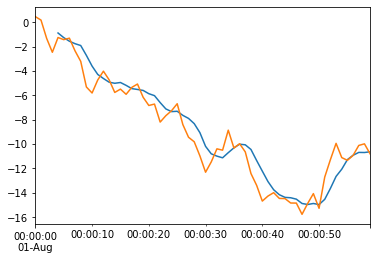

In [313]:
# .rolling().mean() 提供了比較平滑的資料表示方式
# 視窗愈大，產生的變異愈小，視窗愈小，產生的變異愈大
means.plot()
first_minute.plot();

---

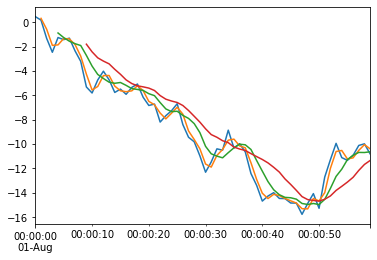

In [314]:
# 注意，視窗愈大，曲線一開始缺少的資料越多
# 一個大小為 n 的視窗要等到有 n 個資料點才能進行計算
hlw = walk['2014-08-01 00:00']
means2 = hlw.rolling(window = 2, center = False).mean()
means5 = hlw.rolling(window = 5, center = False).mean()
means10 = hlw.rolling(window = 10, center = False).mean()
hlw.plot()
means2.plot()
means5.plot()
means10.plot();

---

In [315]:
# 利用 .rolling().apply() 方法，也可以把任何使用者自定義的函數套用在滾動視窗
# 底下示範計算滾動視窗內的資料值與視窗平均值的差異的平均值
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
means = hlw.rolling(window = 5, center = False).apply(mean_abs_dev)
means

2014-08-01 00:00:00         NaN
2014-08-01 00:00:01         NaN
2014-08-01 00:00:02         NaN
2014-08-01 00:00:03         NaN
2014-08-01 00:00:04    0.961700
2014-08-01 00:00:05    0.577708
2014-08-01 00:00:06    0.363580
2014-08-01 00:00:07    0.518130
2014-08-01 00:00:08    0.697645
2014-08-01 00:00:09    1.233866
2014-08-01 00:00:10    1.571846
2014-08-01 00:00:11    1.203926
2014-08-01 00:00:12    0.803608
2014-08-01 00:00:13    0.513497
2014-08-01 00:00:14    0.620997
2014-08-01 00:00:15    0.544468
2014-08-01 00:00:16    0.649621
2014-08-01 00:00:17    0.329836
2014-08-01 00:00:18    0.256892
2014-08-01 00:00:19    0.352235
2014-08-01 00:00:20    0.524383
2014-08-01 00:00:21    0.653054
2014-08-01 00:00:22    0.784528
2014-08-01 00:00:23    0.655071
2014-08-01 00:00:24    0.477667
2014-08-01 00:00:25    0.500380
2014-08-01 00:00:26    0.534068
2014-08-01 00:00:27    0.823218
2014-08-01 00:00:28    1.076579
2014-08-01 00:00:29    1.214319
2014-08-01 00:00:30    1.163313
2014-08-

In [316]:
np.fabs(hlw[:5] - hlw[:5].mean()).mean()

0.961699718884331

<AxesSubplot:>

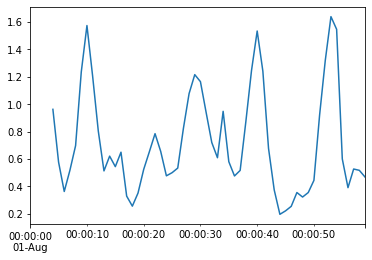

In [317]:
means.plot()

---

In [318]:
# 還有一個擴張視窗平均的計算方法，它總是從時間序列的第一個值開始，不斷的重複計算視窗資料的平均值
# 只不過每次迭代時，都讓視窗大小增加一
# 擴張視窗平均比滾動視窗來得穩定，因為隨著視窗變大，下一個值的影響就會越小
expanding = hlw.expanding(min_periods = 1).mean()
expanding[:10]

2014-08-01 00:00:00    0.469112
2014-08-01 00:00:01    0.327681
2014-08-01 00:00:02   -0.222483
2014-08-01 00:00:03   -0.781473
2014-08-01 00:00:04   -0.874444
2014-08-01 00:00:05   -0.965294
2014-08-01 00:00:06   -1.013157
2014-08-01 00:00:07   -1.179584
2014-08-01 00:00:08   -1.404788
2014-08-01 00:00:09   -1.795408
Freq: S, dtype: float64

In [319]:
hlw[0]

0.4691122999071863

In [320]:
hlw[:2].mean()

0.32768062774285467

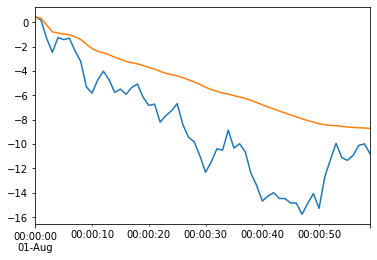

In [321]:
hlw.plot()
expanding.plot();

## 綜合應用

In [322]:
close_px_all = pd.read_csv('./mod09/stock_px_2.csv', parse_dates = True, index_col = 0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [323]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [324]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

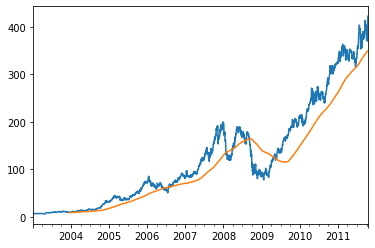

In [325]:
close_px.AAPL.plot()
close_px.AAPL.rolling(window = 250).mean().plot()

In [326]:
# 預設上 rolling 函式的視窗中的值，都必須是 non-NA
# 這行為可使用參數 min_periods 來調整
appl_std250 = close_px.AAPL.rolling(250, min_periods = 10).std()
appl_std250[:20]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
2003-01-20    0.132011
2003-01-21    0.149286
2003-01-22    0.169008
2003-01-23    0.168760
2003-01-24    0.184135
2003-01-27    0.182546
2003-01-28    0.178117
2003-01-29    0.181870
Freq: B, Name: AAPL, dtype: float64

In [327]:
close_px.AAPL[:10].std()

0.0774955195837512

<AxesSubplot:>

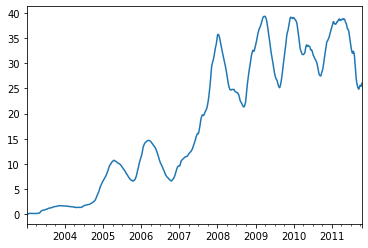

In [328]:
appl_std250.plot()

---

<AxesSubplot:>

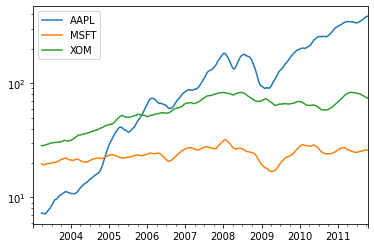

In [329]:
# 如果 Dataframe 呼叫移動視窗的話，就會對每個欄位都套用運算
close_px.rolling(window = 60).mean().plot(logy = True)

In [330]:
# rolling() 函式也接受指定固定時間位移量的字串
close_px.rolling(window = '3D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.450000,21.520000,29.960000
2003-01-07,7.440000,21.725000,29.455000
2003-01-08,7.386667,21.586667,29.246667
...,...,...,...
2011-10-10,388.810000,26.940000,76.280000
2011-10-11,394.550000,26.970000,76.275000
2011-10-12,397.096667,26.966667,76.570000
2011-10-13,403.636667,27.046667,76.600000


---

In [331]:
appl_px = close_px.AAPL['2006':'2007']
appl_px

2006-01-02     71.89
2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
               ...  
2007-12-25    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Freq: B, Name: AAPL, Length: 521, dtype: float64

In [332]:
ma30 = appl_px.rolling(window = 30, min_periods = 20).mean()
ma30[:25]

2006-01-02          NaN
2006-01-03          NaN
2006-01-04          NaN
2006-01-05          NaN
2006-01-06          NaN
2006-01-09          NaN
2006-01-10          NaN
2006-01-11          NaN
2006-01-12          NaN
2006-01-13          NaN
2006-01-16          NaN
2006-01-17          NaN
2006-01-18          NaN
2006-01-19          NaN
2006-01-20          NaN
2006-01-23          NaN
2006-01-24          NaN
2006-01-25          NaN
2006-01-26          NaN
2006-01-27    78.158500
2006-01-30    78.008095
2006-01-31    77.894545
2006-02-01    77.786957
2006-02-02    77.550000
2006-02-03    77.322000
Freq: B, Name: AAPL, dtype: float64

In [333]:
appl_px[:10]

2006-01-02    71.89
2006-01-03    74.75
2006-01-04    74.97
2006-01-05    74.38
2006-01-06    76.30
2006-01-09    76.05
2006-01-10    80.86
2006-01-11    83.90
2006-01-12    84.29
2006-01-13    85.59
Freq: B, Name: AAPL, dtype: float64

In [334]:
# 指數加權函式

ewma30 = appl_px.ewm(span = 30).mean()
ewma30

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

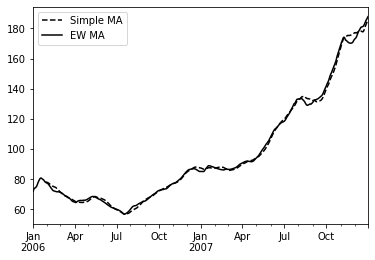

In [335]:
import matplotlib.pyplot as plt
ma30.plot(style = 'k--', label = 'Simple MA')
ewma30.plot(style = 'k-', label = 'EW MA')
plt.legend();

---

In [336]:
# 二元移動視窗函式
spx_px = close_px_all['SPX']
spx_px

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

In [337]:
spx_rets = spx_px.pct_change()
spx_rets

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
                ...   
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, Length: 2214, dtype: float64

In [338]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


In [339]:
corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)
corr

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
                ...   
2011-10-10    0.736464
2011-10-11    0.729906
2011-10-12    0.728404
2011-10-13    0.727165
2011-10-14    0.729858
Length: 2292, dtype: float64

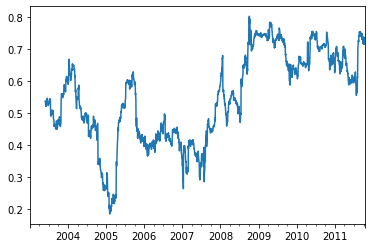

In [340]:
corr.plot();

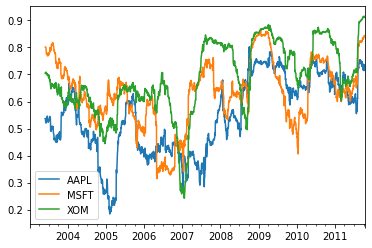

In [341]:
corr = returns.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot();

---

In [342]:
# 準備建立代表五天的隨機漫步值的時間序列
np.random.seed(123456)
count = 24 * 60 * 60 * 5
values = np.random.randn(count)
ws = pd.Series(values)
ws

0         0.469112
1        -0.282863
2        -1.509059
3        -1.135632
4         1.212112
            ...   
431995   -1.731289
431996   -0.477632
431997   -0.849151
431998   -0.255618
431999    1.244068
Length: 432000, dtype: float64

In [343]:
walk = ws.cumsum()
walk

0           0.469112
1           0.186249
2          -1.322810
3          -2.458442
4          -1.246330
             ...    
431995    456.529763
431996    456.052131
431997    455.202981
431998    454.947362
431999    456.191430
Length: 432000, dtype: float64

In [344]:
walk.index = pd.date_range('2014-08-01', periods = len(walk), freq = "S")
walk[:100]

2014-08-01 00:00:00     0.469112
2014-08-01 00:00:01     0.186249
2014-08-01 00:00:02    -1.322810
2014-08-01 00:00:03    -2.458442
2014-08-01 00:00:04    -1.246330
                         ...    
2014-08-01 00:01:35   -19.258604
2014-08-01 00:01:36   -20.212811
2014-08-01 00:01:37   -18.750115
2014-08-01 00:01:38   -20.493276
2014-08-01 00:01:39   -21.319867
Freq: S, Length: 100, dtype: float64

In [345]:
# pandas 的重新取樣是利用 .resample() 方法並傳給一個新頻率來完成
# 此方法在填值的時候比 .asfreq() 方法在填值時更有彈性
# 此例是向下取樣
walk.resample('1min').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [346]:
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In [347]:
walk.resample('1min', closed = 'right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

In [348]:
walk.resample('1min').first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

---

In [349]:
bymin = walk.resample('1min').mean()
bymin

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [350]:
bymin.resample('S').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [351]:
bymin.resample('S').bfill()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [352]:
interpolated  = bymin.resample('S').interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [353]:
bymin['2014-08-01 00:00:00'] + (bymin['2014-08-01 00:01:00'] - bymin['2014-08-01 00:00:00'])*(1/60)

-8.8269032649646

---

In [354]:
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [355]:
ohlc = walk.resample('H').ohlc()
ohlc

,open,high,low,close
2014-08-01 00:00:00,0.469112,0.469112,-67.873166,-2.922520
2014-08-01 01:00:00,-3.374321,23.793007,-56.585154,-55.101543
2014-08-01 02:00:00,-54.276885,5.232441,-87.809456,1.913276
2014-08-01 03:00:00,0.260576,17.124638,-65.820652,-38.530620
2014-08-01 04:00:00,-38.436581,3.537231,-109.805294,-61.014553
...,...,...,...,...
2014-08-05 19:00:00,437.652077,550.408942,430.549178,494.471788
2014-08-05 20:00:00,496.539759,510.371745,456.365565,476.505765
2014-08-05 21:00:00,476.025498,506.952877,425.472410,498.547578
2014-08-05 22:00:00,497.941355,506.599652,411.119919,443.925832


In [356]:
walk['2014-08-01 00'][0]

0.4691122999071863

In [357]:
walk['2014-08-01 00'].max()

0.4691122999071863

In [358]:
walk['2014-08-01 00'].min()

-67.87316617420761

In [359]:
walk['2014-08-01 00'][-1]

-2.9225204923544856